In [9]:
# Importar librerias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [10]:
# Carga desde xlsx sin índice
DF = pd.read_csv('TAILANDIA.BKK_LIMPIO.csv')
DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27546 entries, 0 to 27545
Data columns (total 52 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               27546 non-null  int64  
 1   name                       27546 non-null  object 
 2   description                27546 non-null  object 
 3   neighbourhood_cleansed     27546 non-null  object 
 4   host_name                  27546 non-null  object 
 5   host_since                 27546 non-null  object 
 6   host_location              27546 non-null  object 
 7   host_response_time         27546 non-null  object 
 8   host_is_superhost          27546 non-null  object 
 9   host_has_profile_pic       27546 non-null  object 
 10  host_identity_verified     27546 non-null  object 
 11  neighbourhood              27546 non-null  object 
 12  property_type              27546 non-null  object 
 13  room_type                  27546 non-null  obj

In [11]:
df = DF.drop(columns=['Unnamed: 0'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27546 entries, 0 to 27545
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               27546 non-null  int64  
 1   name                       27546 non-null  object 
 2   description                27546 non-null  object 
 3   neighbourhood_cleansed     27546 non-null  object 
 4   host_name                  27546 non-null  object 
 5   host_since                 27546 non-null  object 
 6   host_location              27546 non-null  object 
 7   host_response_time         27546 non-null  object 
 8   host_is_superhost          27546 non-null  object 
 9   host_has_profile_pic       27546 non-null  object 
 10  host_identity_verified     27546 non-null  object 
 11  neighbourhood              27546 non-null  object 
 12  property_type              27546 non-null  object 
 13  room_type                  27546 non-null  obj

Extraer características estadísticas a partir de un análisis univariado, a diferentes variables categóricas (10). Mostrar los resultados obtenidos ,mediante gráficas y tablas

In [13]:
# Columna: 'host_location'
T_freq1= df['host_location'].value_counts().reset_index()
T_freq1

,host_location,count
0,"Bangkok, Thailand",17366
1,Unknown,6622
2,Thailand,501
3,Singapore,233
4,"Krung Thep Maha Nakhon, Thailand",206
...,...,...
410,"Gimcheon-si, South Korea",1
411,"Olongapo, Philippines",1
412,"Aadorf, Switzerland",1
413,"Agadir, Morocco",1


In [14]:
# Filtrar las ubicaciones excluyendo "Unknown" y "Thailand"
top_7 = (df.loc[~df['host_location'].isin(['Unknown', 'Thailand'])].value_counts('host_location').head(7).reset_index(name='count'))
print(top_7)

                      host_location  count
0                 Bangkok, Thailand  17366
1                         Singapore    233
2  Krung Thep Maha Nakhon, Thailand    206
3                       Philippines    178
4                      Osaka, Japan    116
5                  Phuket, Thailand    115
6              Chiang Mai, Thailand    100


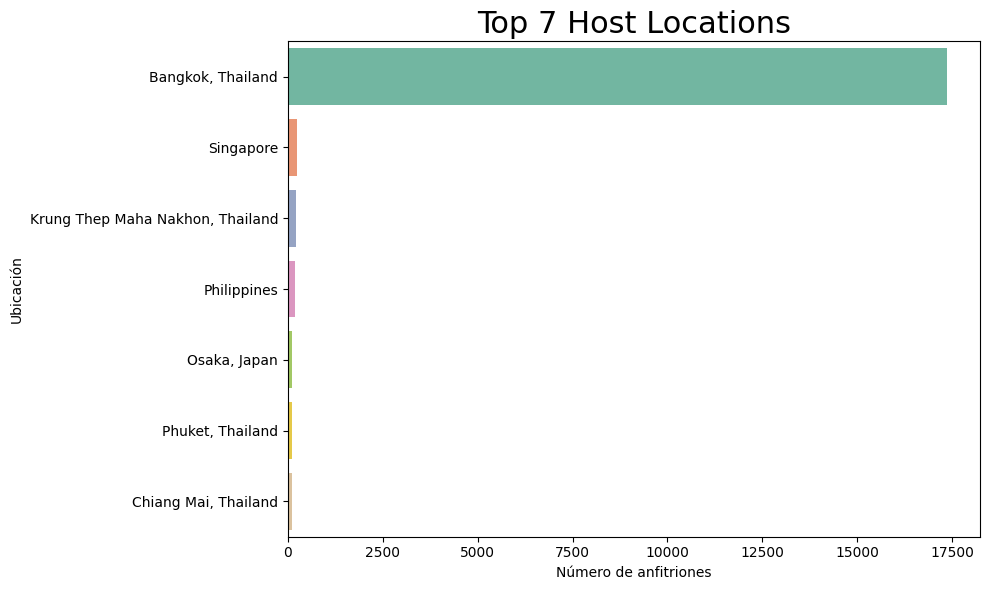

In [15]:
# Gráfico para poder ver el top 7 de host locations excluyendo "Unknown" y "Thailand"
plt.figure(figsize=(10, 6))
sns.barplot(data=top_7, x='count', y='host_location',  hue='host_location', palette='Set2')
plt.title('Top 7 Host Locations', fontsize=22) # Títulos y etiquetas
plt.xlabel('Número de anfitriones')
plt.ylabel('Ubicación')
plt.tight_layout()
plt.show()

In [16]:
# Columna: 'host_location'
T_freq2= df['host_response_time'].value_counts().reset_index()
T_freq2

,host_response_time,count
0,within an hour,18989
1,a few days or more,5255
2,within a few hours,2271
3,within a day,1031


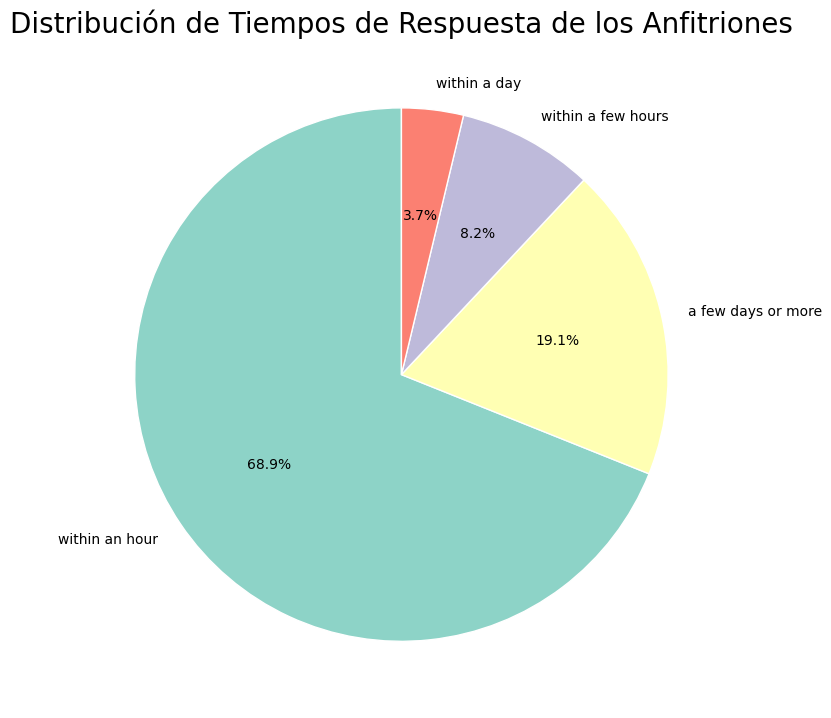

In [17]:
# Gráfico de pastel sin porcentajes
plt.figure(figsize=(8, 8))
plt.pie(T_freq2['count'], labels=T_freq2['host_response_time'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors, wedgeprops={'edgecolor': 'white'})
plt.title('Distribución de Tiempos de Respuesta de los Anfitriones', fontsize=20) # Título
plt.tight_layout()
plt.show()

In [18]:
# Columna: 'property_type'
T_freq3= df['property_type'].value_counts().reset_index()
T_freq3

,property_type,count
0,Entire rental unit,11205
1,Entire condo,4425
2,Private room in rental unit,2910
3,Room in hotel,1867
4,Entire home,1212
...,...,...
75,Castle,1
76,Shared room in vacation home,1
77,Private room in camper/rv,1
78,Private room in treehouse,1


In [19]:
# Filtrar los 8 tipos de propiedad más frecuentes
top8_type_property = df['property_type'].value_counts().head(8).reset_index()
print(top8_type_property)

                 property_type  count
0           Entire rental unit  11205
1                 Entire condo   4425
2  Private room in rental unit   2910
3                Room in hotel   1867
4                  Entire home   1212
5         Private room in home    959
6        Private room in condo    783
7    Private room in townhouse    464


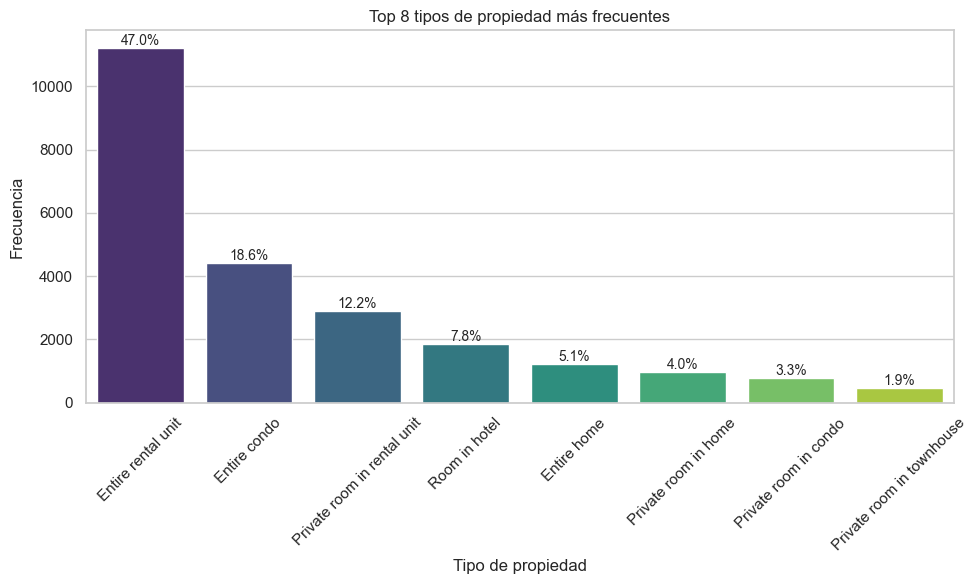

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top8_type_property,
    x='property_type',
    y='count',
    hue='property_type',
    palette='viridis',
    dodge=False,
    legend=False
)

ax.set(title='Top 8 tipos de propiedad más frecuentes', xlabel='Tipo de propiedad', ylabel='Frecuencia')
plt.xticks(rotation=45)

# Calcular y mostrar porcentajes
top8_type_property['pct'] = top8_type_property['count'] / top8_type_property['count'].sum() * 100
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    pct = top8_type_property['pct'].iloc[i]
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [21]:
# Columna: 'neighbourhood_cleansed'
T_freq4= df['neighbourhood_cleansed'].value_counts().reset_index()
T_freq4

,neighbourhood_cleansed,count
0,Vadhana,4337
1,Khlong Toei,3554
2,Huai Khwang,3282
3,Ratchathewi,1617
4,Sathon,1275
5,Phra Nakhon,1108
6,Bang Rak,1088
7,Phra Khanong,1063
8,Chatu Chak,831
9,Suanluang,793


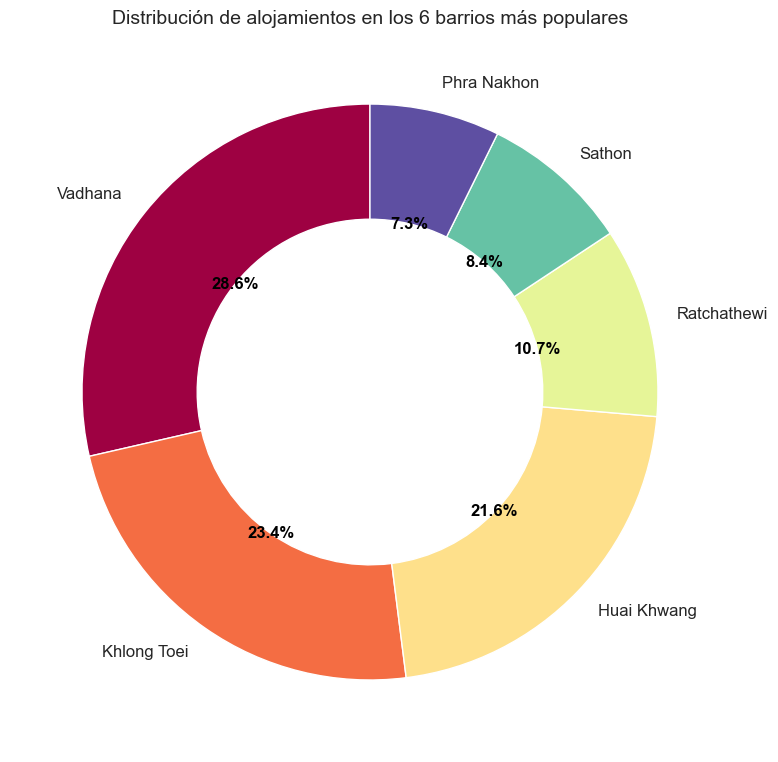

In [22]:
top6_barrios = T_freq4.head(6).copy()  
top6_barrios['pct'] = top6_barrios['count'] / top6_barrios['count'].sum() * 100

# Crear gráfico de dona
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    top6_barrios['pct'],
    labels=top6_barrios['neighbourhood_cleansed'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4),
    colors=plt.cm.Spectral(np.linspace(0, 1, len(top6_barrios)))  # nueva paleta
)

# Estética: porcentajes en negro
plt.setp(autotexts, size=12, weight='bold', color='black')
plt.setp(texts, size=12)

ax.set_title('Distribución de alojamientos en los 6 barrios más populares', fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
# Columna: 'room_type''
T_freq5= df['room_type'].value_counts().reset_index()
T_freq5

,room_type,count
0,Entire home/apt,18126
1,Private room,8714
2,Hotel room,418
3,Shared room,288


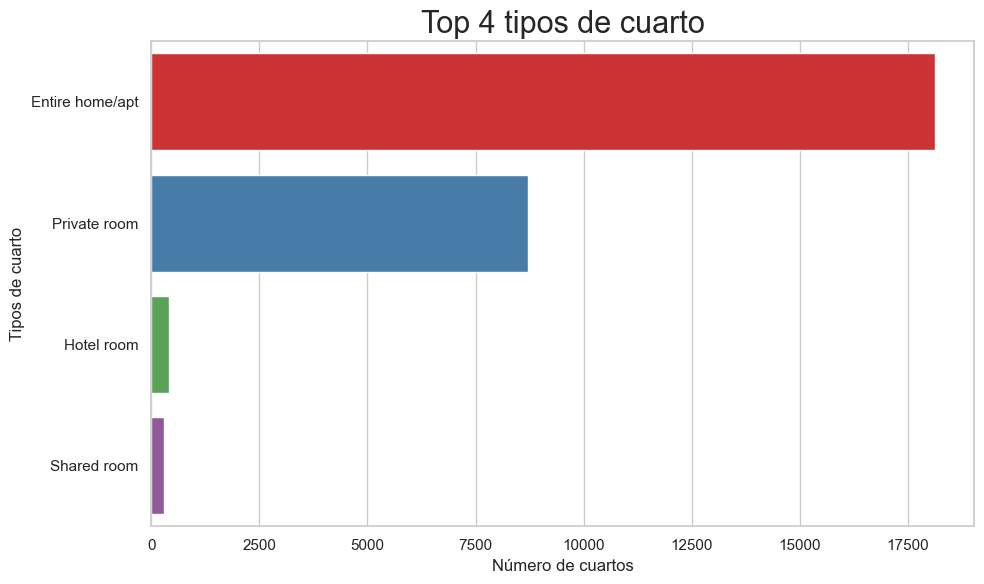

In [24]:
# Gráfico para poder ver el top 7 de host locations excluyendo "Unknown" y "Thailand"
plt.figure(figsize=(10, 6))
sns.barplot(data=T_freq5, x='count', y='room_type',  hue='room_type', palette='Set1')
plt.title('Top 4 tipos de cuarto', fontsize=22) # Títulos y etiquetas
plt.xlabel('Número de cuartos')
plt.ylabel('Tipos de cuarto')
plt.tight_layout()
plt.show()

In [25]:
# Columna: 'bathrooms_text'
T_freq6= df['bathrooms_text'].value_counts().reset_index()
T_freq6

,bathrooms_text,count
0,1 bath,14197
1,1 private bath,5054
2,2 baths,3089
3,1.5 baths,1236
4,1 shared bath,887
...,...,...
61,13 shared baths,1
62,20 baths,1
63,8.5 shared baths,1
64,11.5 baths,1


In [26]:
T_freq6.columns = ['bathroom_type', 'count']
top5_bathrooms = T_freq6.sort_values(by='count', ascending=False).head(5)

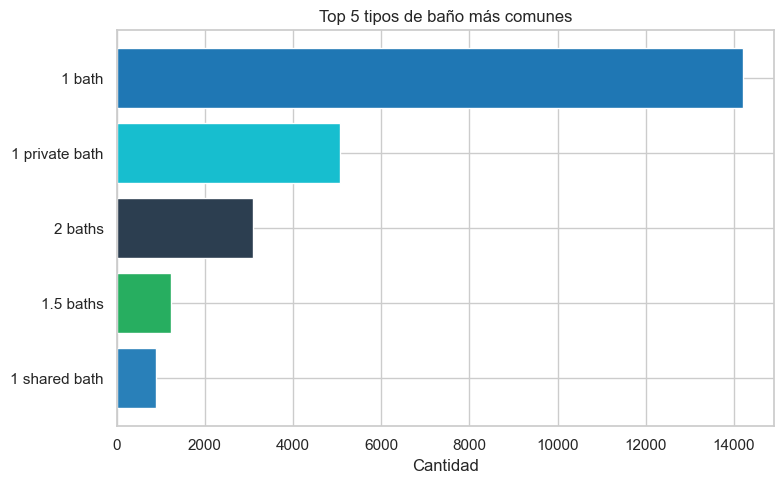

In [27]:
plt.figure(figsize=(8, 5))
plt.barh(top5_bathrooms['bathroom_type'], top5_bathrooms['count'], color= ['#1f77b4', '#17becf', '#2c3e50', '#27ae60', '#2980b9'])
plt.xlabel("Cantidad")
plt.title("Top 5 tipos de baño más comunes")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [28]:
# Columna: 'host_verifications'
T_freq7= df['host_verifications'].value_counts().reset_index()
T_freq7

KeyError: 'host_verifications'

In [ ]:
f_host_verf = df[df['host_verifications'] != '[]']
# Tabla de frecuencia
f_host_v = f_host_verf['host_verifications'].value_counts().head(6).to_frame().reset_index()
f_host_v.columns = ['host_verifications', 'count']

# Establecer índice para el gráfico
f_host_v.set_index('host_verifications', inplace=True)

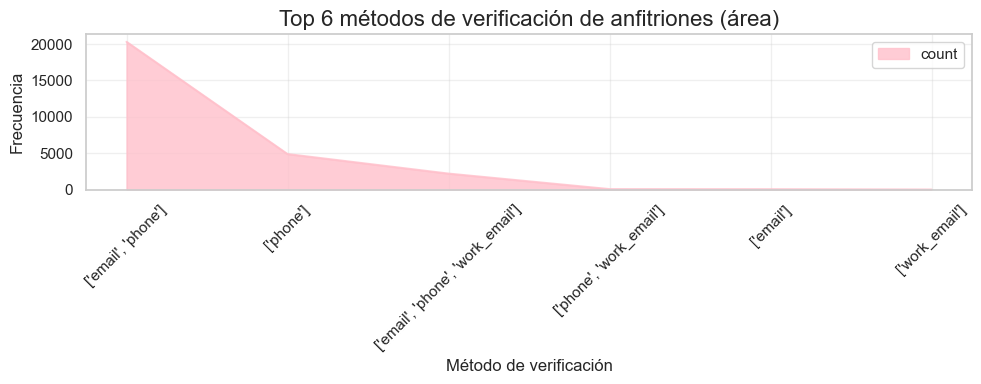

In [ ]:
# Gráfico de área
f_host_v.plot(kind='area', figsize=(10, 4), alpha=0.8, color='pink')

plt.title('Top 6 métodos de verificación de anfitriones (área)', fontsize=16)
plt.xlabel('Método de verificación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Columna: 'host_identity_verified'
T_freq8= df['host_identity_verified'].value_counts().reset_index()
T_freq8

,host_identity_verified,count
0,t,25119
1,f,2427


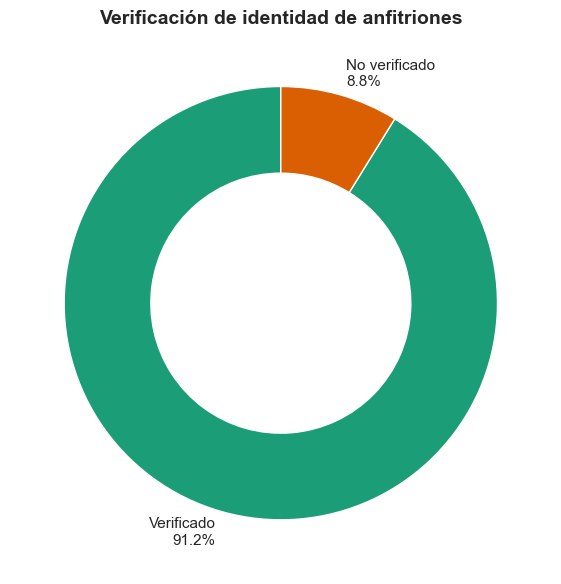

In [ ]:
# Datos
labels = ['Verificado', 'No verificado']
counts = [25119, 2427]
colors = ['#1b9e77', '#d95f02']

# Calcular porcentajes
total = sum(counts)
pct = [round(c / total * 100, 1) for c in counts]
labels_pct = [f"{l}\n{p}%" for l, p in zip(labels, pct)]

# Crear gráfico
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(counts, labels=labels_pct, colors=colors, startangle=90, wedgeprops=dict(width=0.4))
ax.set_title("Verificación de identidad de anfitriones", fontsize=14, fontweight='bold') # Estilo
plt.tight_layout()
plt.show()


In [ ]:
# Columna: 'calendar_last_scraped' indica cuándo se actualizó por última vez el estado del calendario
T_freq9= df['calendar_last_scraped'].value_counts().reset_index()
T_freq9

,calendar_last_scraped,count
0,20/03/2025,12465
1,21/03/2025,12226
2,19/03/2025,2855


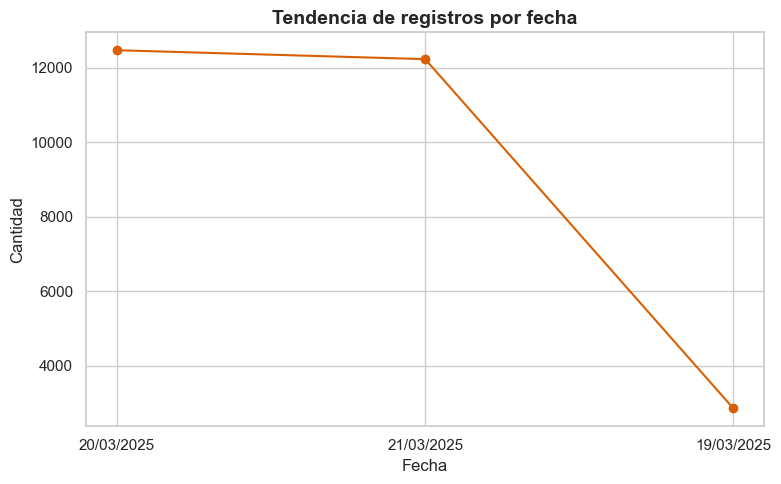

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(T_freq9['calendar_last_scraped'], T_freq9['count'], marker='o', linestyle='-', color='#d95f02')
plt.title("Tendencia de registros por fecha", fontsize=14, fontweight='bold')
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Columna: ''
T_freq10= df['has_availability'].value_counts().reset_index()
T_freq10

,has_availability,count
0,t,25315
1,f,2231


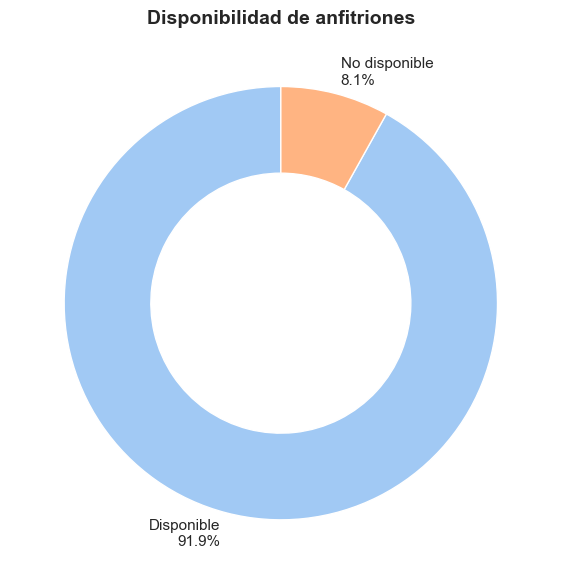

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de que los datos estén en el orden correcto
labels = ['Disponible', 'No disponible']
counts = T_freq10['count'].tolist()
colors = ['#A1C9F4', '#FFB482']

# Calcular porcentajes
total = sum(counts)
pct = [round(c / total * 100, 1) for c in counts]
labels_pct = [f"{l}\n{p}%" for l, p in zip(labels, pct)]

# Crear gráfico
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(
    counts,
    labels=labels_pct,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.4)
)

# Estilo
ax.set_title("Disponibilidad de anfitriones", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Categorizar las siguientes variables: ” host_response_rate”, “host_acceptance_rate”, “host_total_listings_count”, “accommodates”, “bathrooms_text”, “beds”, “price”, “maximum_nights_avg_ntm”, “availability_365”, “number_of_reviews”, “review_scores_value”, “reviews_per_month” aplicando la regla de Sturges y desplegar en un gráfico las frecuencias de las categorías obtenidas.

In [ ]:
variables = [
    'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count',
    'accommodates', 'beds', 'price', 'maximum_nights_avg_ntm',
    'availability_365', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month'
]

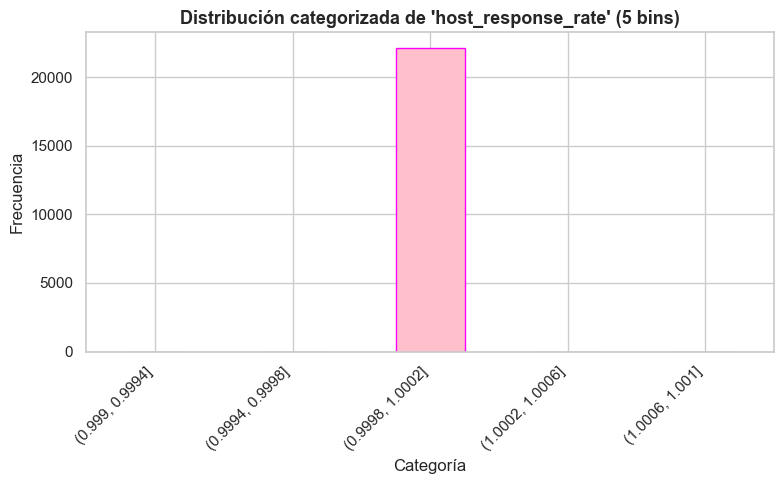

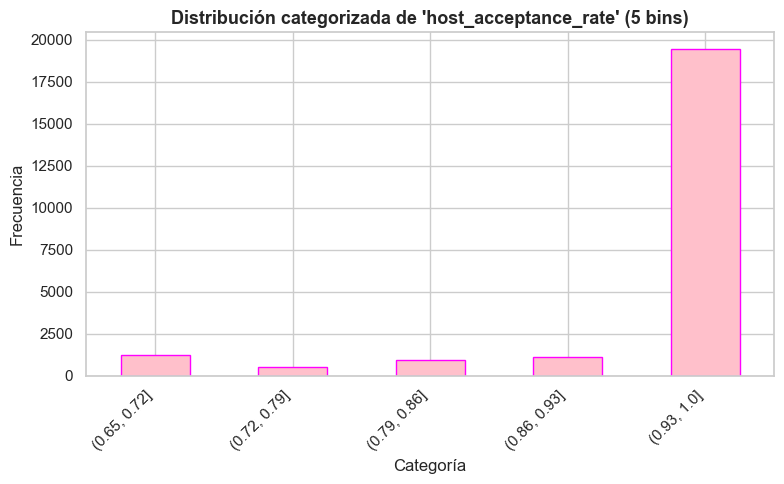

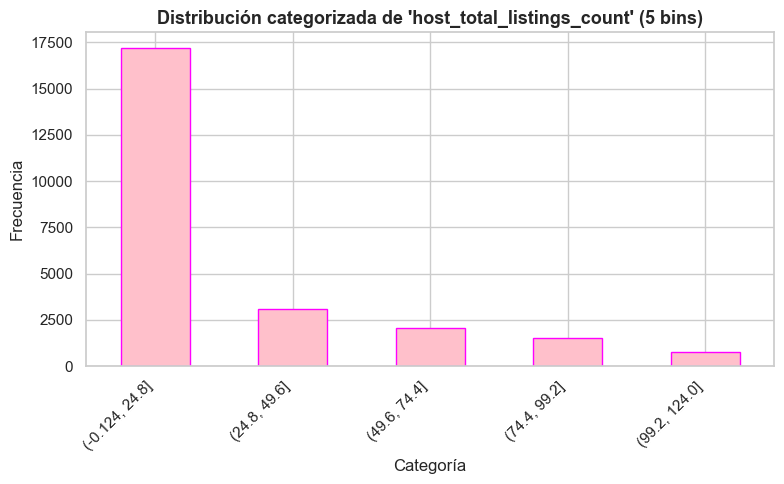

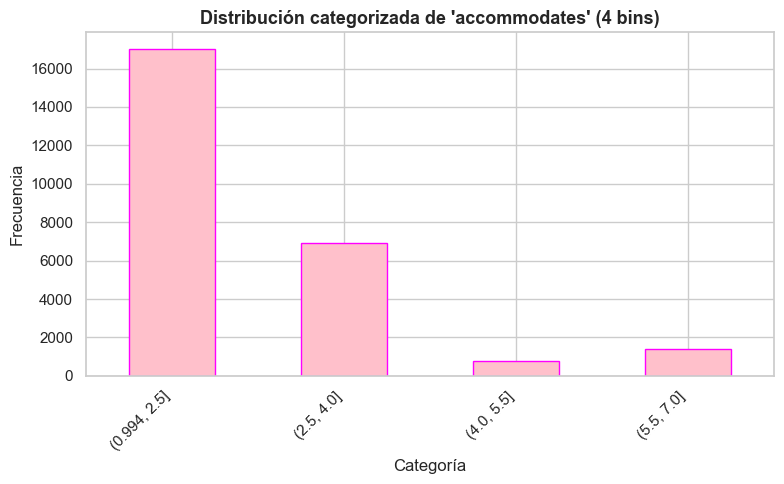

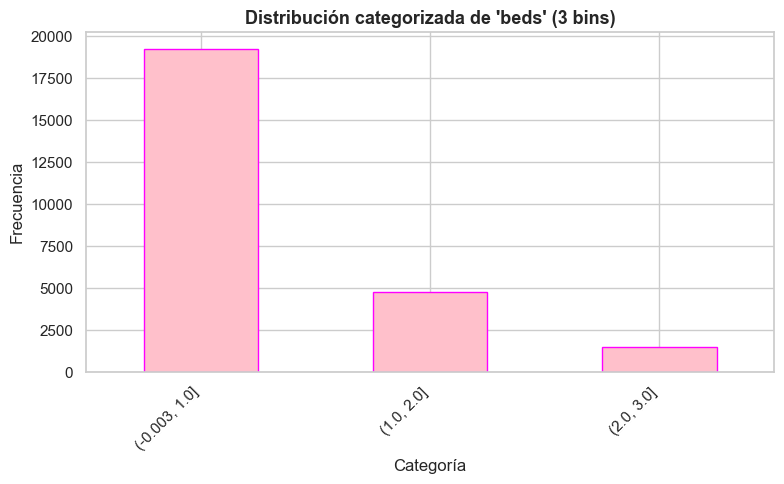

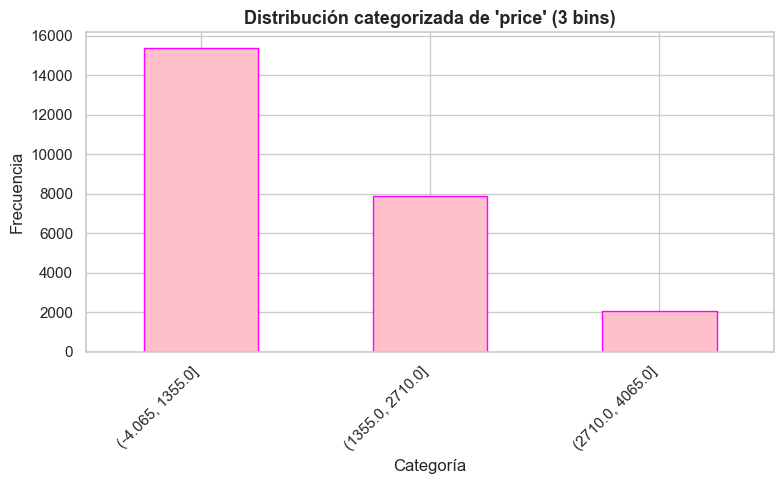

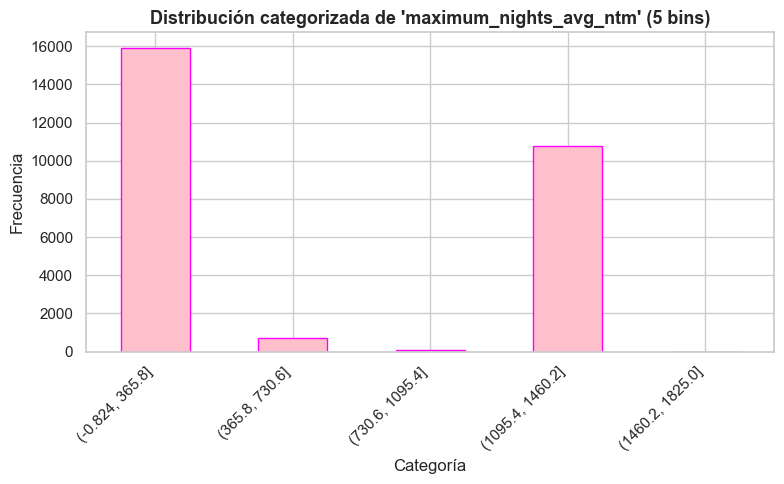

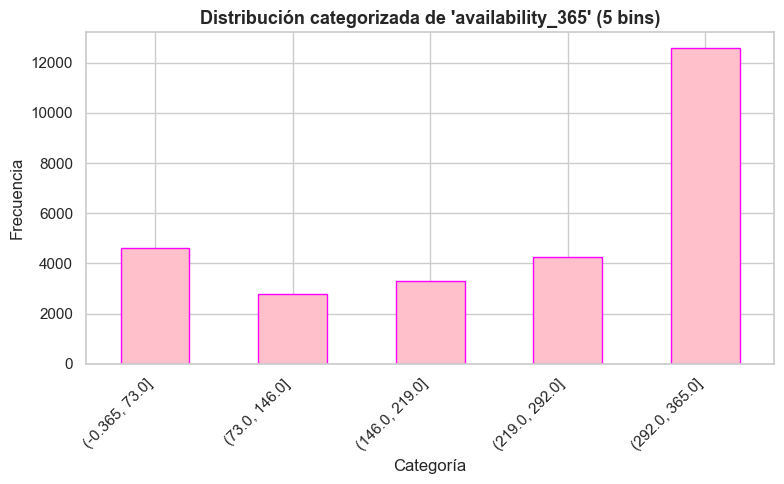

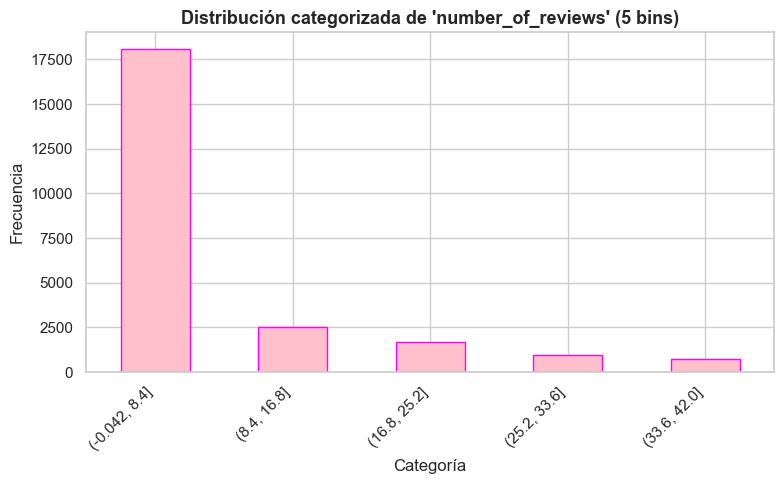

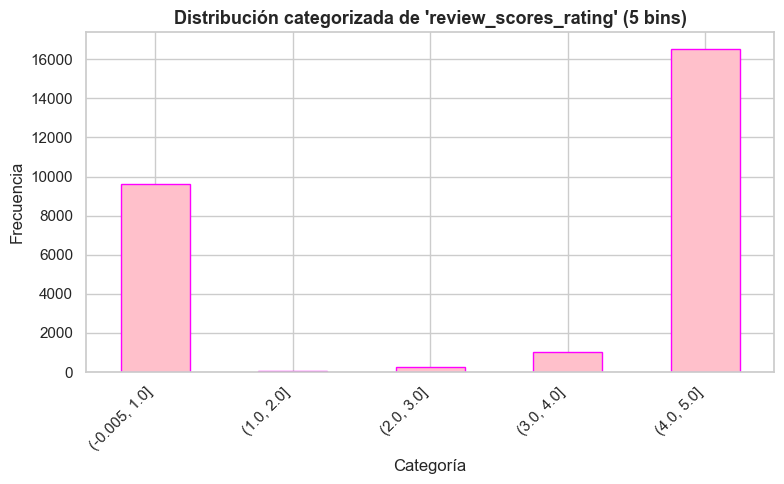

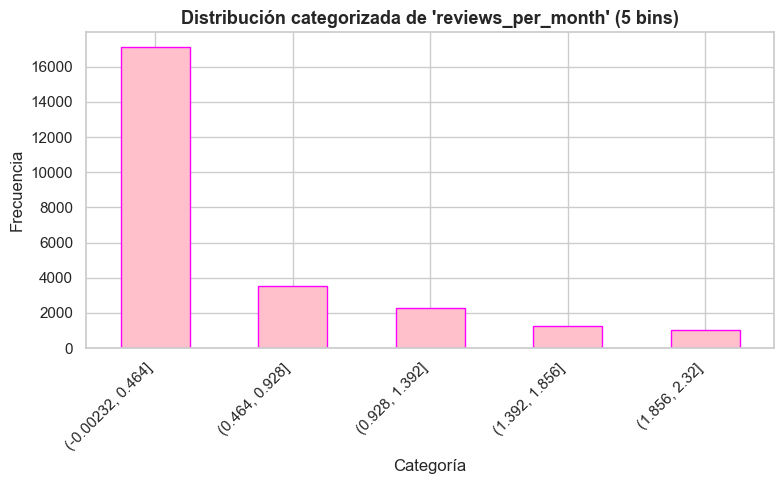

In [ ]:
for var in variables:
    n = len(var)
    k = int(1 + math.log2(n))
    # Categorizar con pd.cut
    df[f'{var}_cat'] = pd.cut(df[var], bins=k)

    # Calcular frecuencias
    freq = df[f'{var}_cat'].value_counts().sort_index()


 # Graficar
    plt.figure(figsize=(8, 5))
    freq.plot(kind='bar', color= 'pink', edgecolor='magenta')
    plt.title(f"Distribución categorizada de '{var}' ({k} bins)", fontsize=13, fontweight='bold')
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()